# The Sparks Foundation - Data Science and Business Analytics Internship

## TASK 1- Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

## Steps
 Step 1: Importing the database<br>
 Step 2: Visualizing the database<br>
 Step 3: Data preparation<br>
 Step 4: Training the algoritham<br>
 Step 5: Visualizing the model<br>
 Step 6: Making the predictions<br>
 Step 7: Evaluating the model<br>

## Author : Amisha Patil

## STEP 1 - Importing the database

In this step we will import the dataset through the link with the help of pandas libraryand then we will observe the data 




In [8]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
#reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [10]:
#now let's observe the database

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
#to find the number of columns and rows
df.shape

(25, 2)

In [13]:
#to find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
# now we will check if our dataset contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

as we can see we we do not have any null values in our database so now we can move to our next step




## STEP 2- Visualizing the database

In this we will plot the database to check whether we can observe any relation between two variables or not.

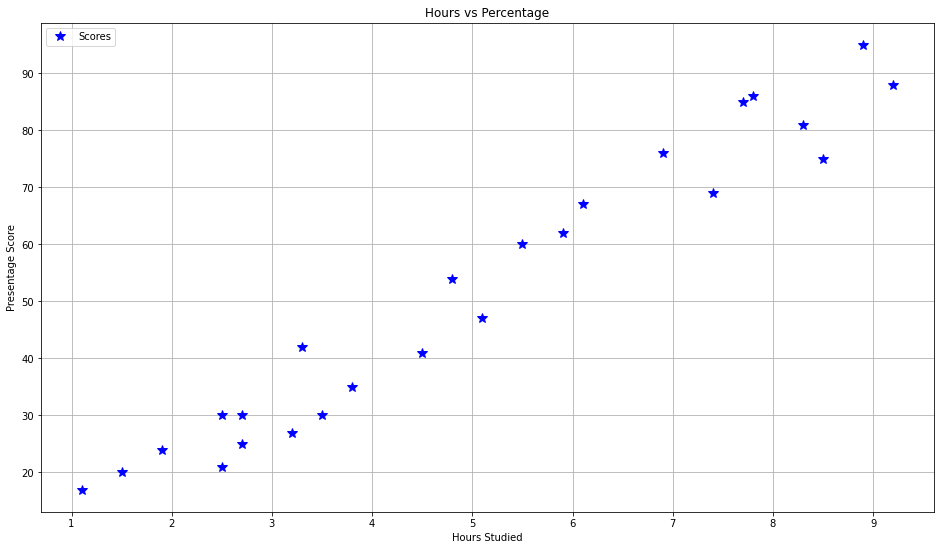

In [16]:
# Plotting the database
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours' , y='Scores' , style='*' , color='blue' , markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Presentage Score')
plt.grid()
plt.show()



From the above graph we can observe that there is linear relationship between 'Hours Studied' and 'Percentage Score' So we can use the linear regression supervised machine model on it to predict further values

In [17]:
#we can also use .corr to determine the corelation between the variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000



## STEP 3- Data Preparation

In this step we will divide the data into 'features'(inputs) and 'labels'(outputs) After that we will split the database into 2 parts testing data and training data

In [18]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
#using iloc function we will divide the data
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [22]:
#splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)


## STEP 4- Training The Algorithm

We have splitted our data into training and testing sets and now we will train our model

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()


## STEP 5- Visualizing the Model

Now we are going to visualize the model


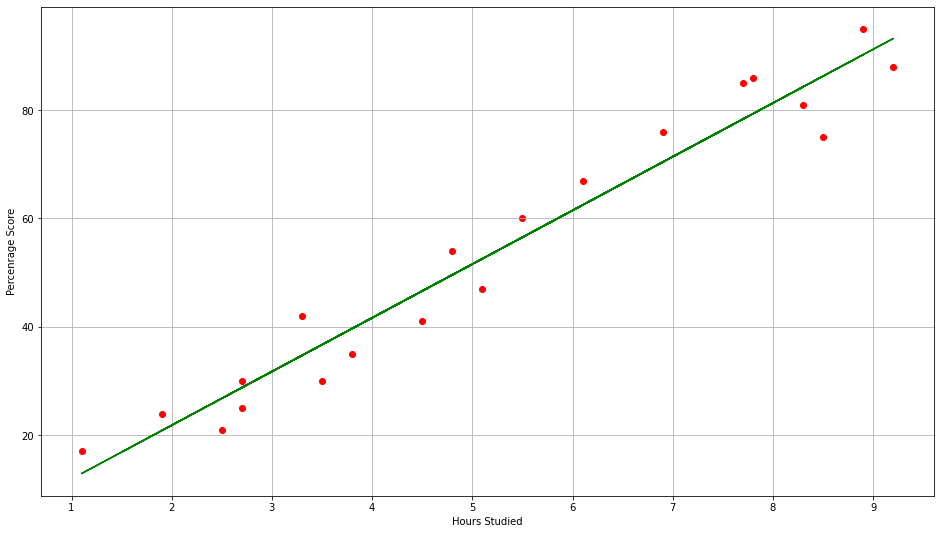

In [24]:
line = model.coef_*x + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train , y_train , color='red')
plt.plot(x, line , color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percenrage Score')
plt.grid()
plt.show()

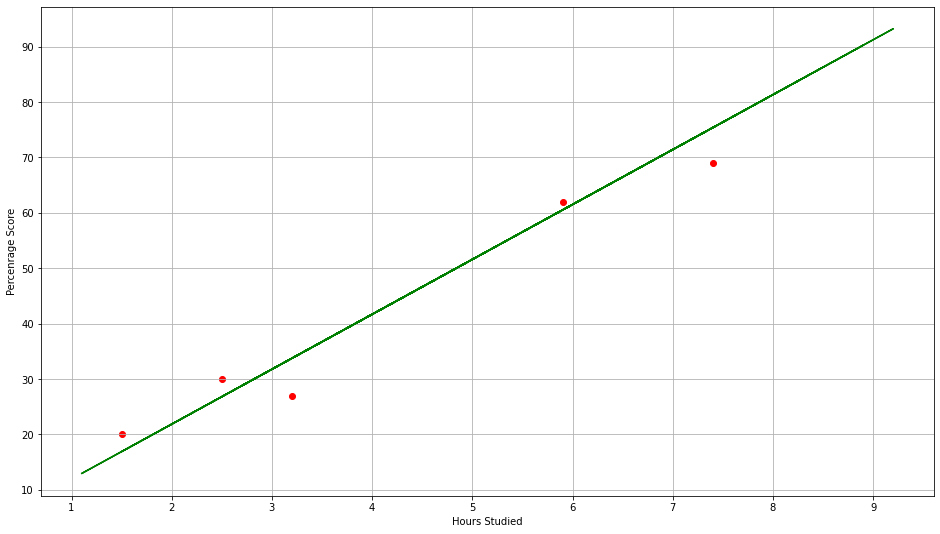

In [25]:
#plotting for the testing  data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test , y_test , color='red')
plt.plot(x, line , color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percenrage Score')
plt.grid()
plt.show()

## STEP 6- Making Predictions

Now its time to make some predictions

In [27]:
print(x_test)                     #Testing data - In H ours
y_pred = model.predict(x_test)    # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# comparing actual vs predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [29]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [49]:

# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test], 'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [50]:

# Testing with your own data

hours =9.25
own_pred = model.predict([[hours]])
print("The predicted score if s person studies for",hours,"hours is",own_pred[0])

The predicted score if s person studies for 9.25 hours is [93.69173249]


Here it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173249

## STEP 7- Evaluating the model

In this last step we are going to evaluate our trained model by calculating mean absolute error



In [27]:
from sklearn import metrics
print("Mean absolutr error: ",metrics.mean_absolute_error(y_test, y_pred))

Mean absolutr error:  4.183859899002975
